# Diabetes Data Analysis

## Introduction

This notebook presents an exploratory data analysis of a diabetes dataset. The objective is to uncover insights and patterns related to the onset of diabetes in individuals based on various health metrics.

## Table of Contents

1. [Data Exploration](#Data-Exploration)
2. [Data Cleaning](#Data-Cleaning)
3. [Data Visualization](#Data-Visualization)
4. [Correlation Analysis](#Correlation-Analysis)
5. [Conclusion](#Conclusion)

## Data Exploration

In this section, we'll load and take an initial look at the data to understand its structure and content.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
file_path = r'C:\Users\Haroon\Documents\diabetesAnalysis\diabetes.csv'
diabetes_df = pd.read_csv(file_path) 

In [3]:
diabetes_df.info()
diabetes_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Cleaning

In [9]:
# values of 0 are unrealistic and therefore subsituting for the median instead for a more accurate analysis

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    diabetes_df[col] = diabetes_df[col].replace(0, diabetes_df[col].median())


# Data Visualization

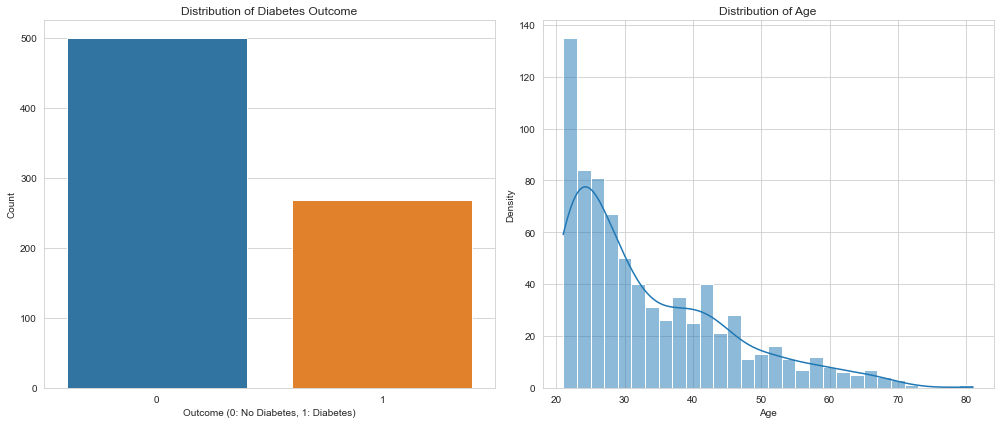

In [6]:
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(14, 6))

# 1. Visualize the Distribution of the Outcome Variable
plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=diabetes_df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')

# 2. Visualizing age
plt.subplot(1, 2, 2)
sns.histplot(diabetes_df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



<h2 id="data-visualization" style="color: darkblue;">Data Visualization</h2>

<ul style="font-size: 16px;">
    <li>A huge amount of people in this dataset do not have diabetes compared to those who do.</li>
    <li>The majority of the dataset's individuals are also aged between 20 and 40, and few older aged people.</li>
</ul>


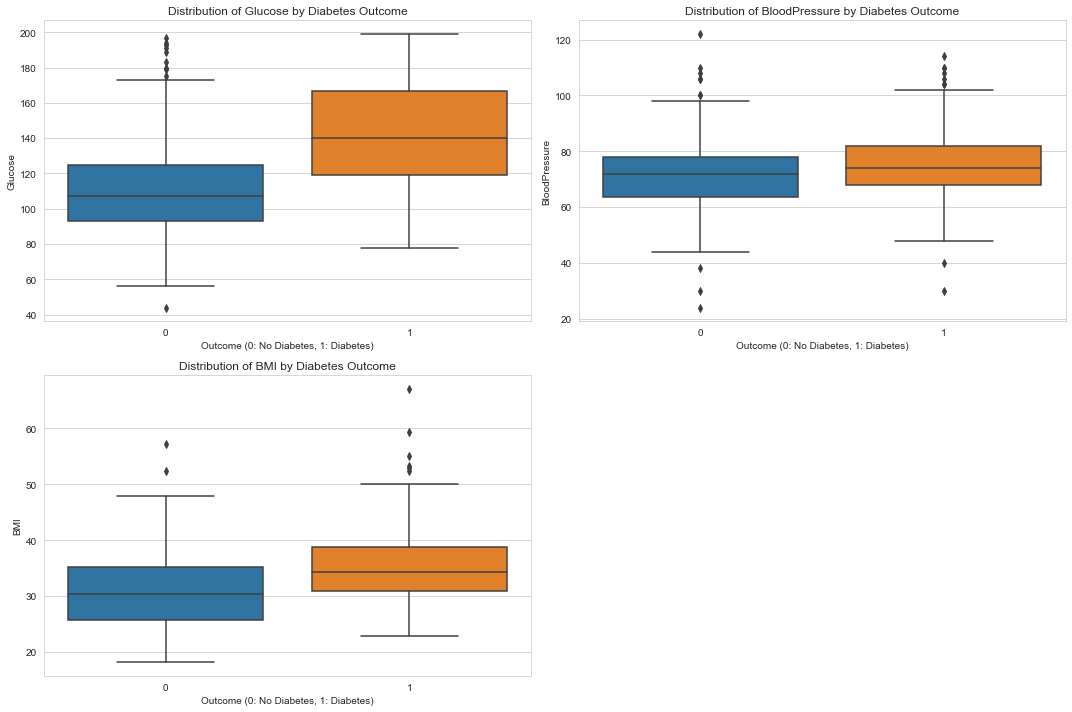

In [13]:
plt.figure(figsize=(15, 10))

# Looking into factors of glucose, blood pressure, and bmi and seeing how they compare
variables_to_plot = ['Glucose', 'BloodPressure', 'BMI']
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Outcome', y=var, data=diabetes_df)
    plt.title(f'Distribution of {var} by Diabetes Outcome')
    plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

<h2 style="color: darkblue;">Key Observations:</h2>
<ul style="font-size: 16px;">
    <li>Those with higher glucose levels also tend to have diabetes<li>
    <li>Blood pressure takes a slight jump fro those with diabetes</li>
    <li>People with diabetes have a higher BMI on average compared to those without diabetes.</li>
</ul>


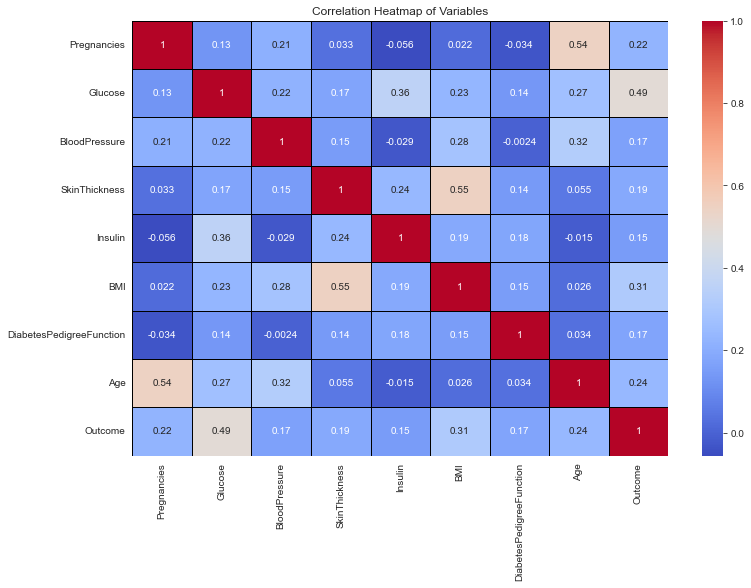

In [16]:
# Looking for any correlations

corr_matrix = diabetes_df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

plt.title('Correlation Heatmap of Variables')
plt.show()


<h2 id="correlation-analysis" style="color: darkblue;">Correlation Analysis</h2>

<p style="font-size: 16px;">Identifying which health metrics are possibly correlatedwith each other and with the diabetes outcome.</p>

<b>Key Observations:</b>
<ul style="font-size: 16px;">
    <li>There's a strong positive correlation between glucose levels and the diabetes outcome.</li>
    <li>Age and BMI also show positive correlations with the diabetes outcome.</li>
</ul>

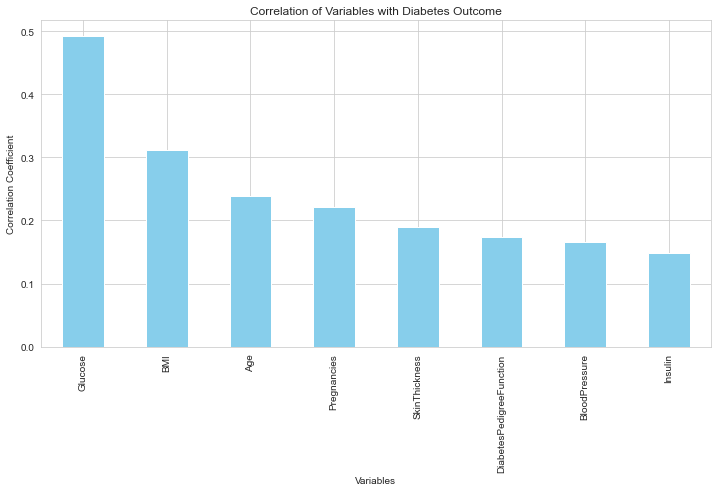

In [17]:
correlation_with_outcome = diabetes_df.corr()['Outcome'].sort_values(ascending=False)

correlation_with_outcome = correlation_with_outcome.drop('Outcome')

# Plot the correlations
plt.figure(figsize=(12, 6))
correlation_with_outcome.plot(kind='bar', color='skyblue')
plt.title('Correlation of Variables with Diabetes Outcome')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.show()

<h2 id="correlation-analysis" style="color: darkblue;">Correlation Analysis</h2>

<p style="font-size: 16px;">
As it appears, <b>Glucose</b> has the highest positive correlation with the diabetes outcome, a significant factor. Other variables like <b>BMI</b>, <b>Age</b>, and <b>Pregnancies</b> also positive correlations, influences of diabetes risk.
</p>


In [18]:
# Age Groups
bins_age = [0, 30, 50, 100]
labels_age = ['Young', 'Middle-Aged', 'Elderly']
diabetes_df['AgeGroup'] = pd.cut(diabetes_df['Age'], bins=bins_age, labels=labels_age, right=False)

# BMI Categories
bins_bmi = [0, 18.5, 24.9, 29.9, 60]
labels_bmi = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
diabetes_df['BMICategory'] = pd.cut(diabetes_df['BMI'], bins=bins_bmi, labels=labels_bmi, right=False)

# Calculate diabetes rate by Age Group
diabetes_by_age = diabetes_df.groupby('AgeGroup')['Outcome'].mean()

# Calculate diabetes rate by BMI Category
diabetes_by_bmi = diabetes_df.groupby('BMICategory')['Outcome'].mean()

diabetes_by_age, diabetes_by_bmi

(AgeGroup
 Young          0.212121
 Middle-Aged    0.498233
 Elderly        0.483146
 Name: Outcome, dtype: float64,
 BMICategory
 Underweight      0.000000
 Normal Weight    0.069307
 Overweight       0.217143
 Obese            0.455852
 Name: Outcome, dtype: float64)

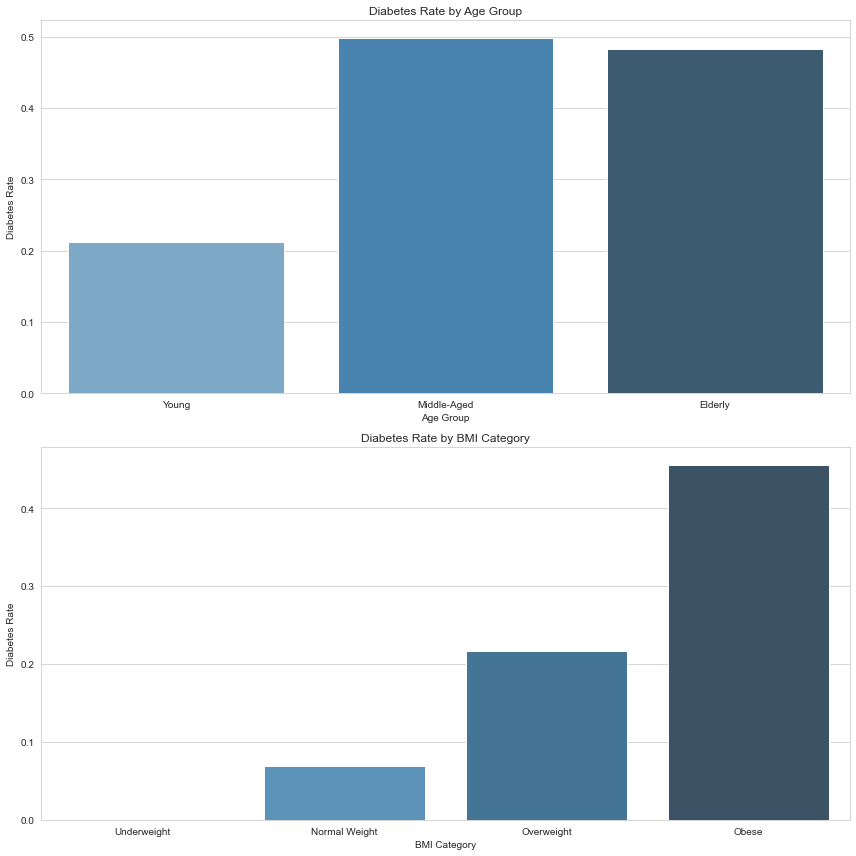

In [19]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot diabetes rate by Age Group
sns.barplot(x=diabetes_by_age.index, y=diabetes_by_age.values, ax=ax[0], palette="Blues_d")
ax[0].set_title('Diabetes Rate by Age Group')
ax[0].set_ylabel('Diabetes Rate')
ax[0].set_xlabel('Age Group')

# Plot diabetes rate by BMI Category
sns.barplot(x=diabetes_by_bmi.index, y=diabetes_by_bmi.values, ax=ax[1], palette="Blues_d")
ax[1].set_title('Diabetes Rate by BMI Category')
ax[1].set_ylabel('Diabetes Rate')
ax[1].set_xlabel('BMI Category')

# Adjust layout
plt.tight_layout()
plt.show()

<h2 id="subgroup-analysis" style="color: darkblue;">Subgroup Analysis</h2>

<p style="font-size: 16px;">
Breaking down the data into subgroups provides nuanced insights into specific segments of the population. In this section, we visualize the diabetes rate across different age and BMI categories.
</p>

<h3 style="color: darkblue;">Diabetes Rate by Age Group</h3>
<p style="font-size: 16px;">
The bar chart illustrates a marked difference in diabetes rates across age groups. Notably, the <b>Young</b> age group has a considerably lower rate compared to the <b>Middle-Aged</b> and <b>Elderly</b> groups. This suggests age is a significant factor influencing diabetes risk.
</p>

<h3 style="color: darkblue;">Diabetes Rate by BMI Category</h3>
<p style="font-size: 16px;">
Individuals classified as <b>Obese</b> exhibit a significantly higher rate of diabetes. The visualization underscores the escalating diabetes risk as we progress from the <b>Underweight</b> to the <b>Obese</b> BMI category, emphasizing the role of body weight in diabetes onset.
</p>


In [23]:
# Export the transformed dataset to a CSV file for Power BI
export_path = r"C:\Users\Haroon\Documents\diabetesAnalysis\diabetes_transformed.csv"
diabetes_df.to_csv(export_path, index=False)

export_path

'C:\\Users\\Haroon\\Documents\\diabetesAnalysis\\diabetes_transformed.csv'